$n$個のデータ$(x_1,y_1),...(x_n,y_n)$が観測され、各$y_i$が

$$
y_i=\alpha +\beta x_i+u_i,\ i=1,...,n
$$

が得られます。

最小二乗法による、
$$
\hat{\beta}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{標本共分散(x_i,y_i)}{標本分散(x_i)}
$$

$$
\hat{\alpha}=\hat{y}-\hat{\beta}\bar{x}
$$

で回帰モデルの係数を推定することができる。

以下は、仮想データを作成し、回帰モデルの係数推定式によって計算した結果が真の値にどれほど近づくかを検証するためのコードである
このコードに基づいて、課題に解答しなさい。

In [2]:
# 線形回帰モデルのデータをシミュレーションで生成します
import numpy as np

# サンプルデータ
# パラメータ
beta_0 = 2.5  # 切片
beta_1 = 0.8  # 傾き
n = 100  # データ数

# 説明変数を一様分布から生成
x = np.random.uniform(low=0, high=10, size=n)

# ノイズ項を標準正規分布から生成
epsilon = np.random.normal(loc=0, scale=1, size=n)

# 目的変数を生成
y = beta_0 + beta_1 * x + epsilon

In [3]:
# パラメータの推定
x_mean = np.mean(x)
y_mean = np.mean(y)

# β₁の推定
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta = numerator / denominator
print("beta: ", beta)
# β₀の推定
alpha = y_mean - beta * x_mean

print("alpha: ", alpha)

beta:  0.823481103136274
alpha:  2.471159826636163


# 課題1

母集団回帰係数、誤差項とサンプルサイズを指定し、観測データ($x$,$y$)を生成する関数を作成しなさい

In [1]:
import numpy as np

def generate_linear_data(beta_0, beta_1, sigma, n, x_low=0, x_high=10):
    """
    線形回帰モデルの観測データを生成する関数

    Parameters:
    beta_0 (float): 切片 (母集団回帰係数)
    beta_1 (float): 傾き (母集団回帰係数)
    sigma (float): 誤差項の標準偏差
    n (int): サンプルサイズ
    x_low (float): xの下限 (デフォルト=0)
    x_high (float): xの上限 (デフォルト=10)

    Returns:
    x (ndarray): 説明変数
    y (ndarray): 目的変数
    """
    # 説明変数xを一様分布から生成
    x = np.random.uniform(low=x_low, high=x_high, size=n)
    
    # 誤差項epsilonを正規分布から生成
    epsilon = np.random.normal(loc=0, scale=sigma, size=n)
    
    # 目的変数yを生成
    y = beta_0 + beta_1 * x + epsilon
    
    return x, y


In [2]:
x, y = generate_linear_data(beta_0=2.5, beta_1=0.8, sigma=1.0, n=100)
print(x,y)

[2.68089468 5.6515672  5.19137116 9.85812872 3.54072826 2.01061924
 1.18965911 3.6736297  3.97171934 4.58858935 6.47259163 8.97405239
 5.53830747 2.36583791 4.91614151 0.14744528 0.38742845 0.35523522
 8.67970182 4.87081679 4.70172226 6.11345381 4.08882769 6.83506727
 7.01392297 5.70120195 7.98218822 5.09331172 5.0933996  4.08207437
 7.33088394 3.63549974 3.48160843 5.858098   0.68140929 1.07749555
 8.39464486 2.80001755 2.48818562 4.39676987 8.77193318 8.23164154
 0.4398754  3.50151502 3.29486903 6.39724821 4.64932455 6.82650086
 8.97915797 3.04799443 7.00471321 1.59164585 0.41032638 6.12579714
 9.0730892  7.8011763  8.33874746 2.65159567 3.88904466 2.66823859
 8.22642705 0.1455985  0.70983012 9.16991957 5.46445261 0.1891081
 0.32383328 8.71500424 1.45465099 1.34959718 7.99924744 1.11346294
 3.70797066 3.54151797 3.85165272 2.15071597 9.01156071 1.55042425
 4.87472673 1.19771434 7.00436826 5.85578532 5.13184867 6.49285902
 2.49307546 3.82894974 6.29509576 1.82690061 1.9505495  7.43065

# 課題2

観測データ($x$,$y$)で、最小二乗法で回帰係数を推定する関数を作成しなさい

In [3]:
import numpy as np

def estimate_ols(x, y):
    """
    最小二乗法による単回帰モデルの回帰係数推定
    
    Parameters:
    x (ndarray): 説明変数
    y (ndarray): 目的変数
    
    Returns:
    alpha_hat (float): 推定された切片（α）
    beta_hat (float): 推定された傾き（β）
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # 傾き（β）の推定
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    beta_hat = numerator / denominator

    # 切片（α）の推定
    alpha_hat = y_mean - beta_hat * x_mean

    return alpha_hat, beta_hat

In [4]:
x, y = generate_linear_data(beta_0=2.5, beta_1=0.8, sigma=1.0, n=100)

# 回帰係数推定
alpha_hat, beta_hat = estimate_ols(x, y)

print("推定された切片 (alpha):", alpha_hat)
print("推定された傾き (beta):", beta_hat)

推定された切片 (alpha): 2.8744356898363144
推定された傾き (beta): 0.7504703943806673


# 課題3

- 一定な母集団回帰係数、誤差項サンプルサイズを設定し、観測データを作成し、回帰係数を推定するといった推定プロセスを100回を行いなさい。
- 毎回の推定値を格納し、その平均と標準偏差を計算しなさい。
- サンプルサイズが $20, 50, 100, 200, 500,1000$である場合、推定値の平均と標準偏差を比較しなさい

 Sample Size |   Mean of β̂ |    Std of β̂
----------------------------------------
          20 |      0.81734 |      0.08540
          50 |      0.79686 |      0.05109
         100 |      0.80157 |      0.03241
         200 |      0.80309 |      0.02359
         500 |      0.79731 |      0.01333
        1000 |      0.80020 |      0.01151


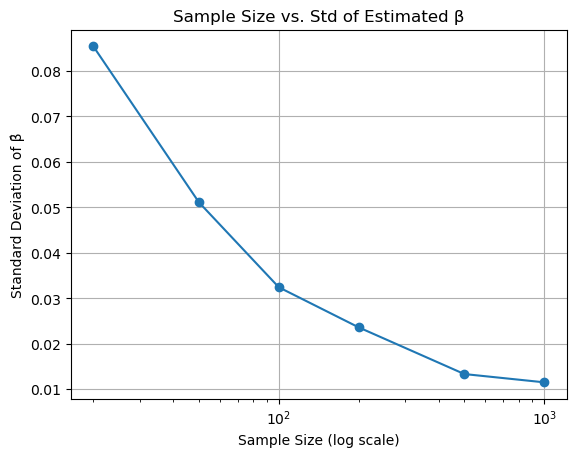

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. データ生成関数
def generate_linear_data(beta_0, beta_1, sigma, n, x_low=0, x_high=10):
    x = np.random.uniform(low=x_low, high=x_high, size=n)
    epsilon = np.random.normal(loc=0, scale=sigma, size=n)
    y = beta_0 + beta_1 * x + epsilon
    return x, y

# 2. 最小二乗法による回帰係数推定関数
def estimate_ols(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    alpha_hat = y_mean - beta_hat * x_mean
    return alpha_hat, beta_hat

# 3. シミュレーション設定
beta_0_true = 2.5  # 真の切片
beta_1_true = 0.8  # 真の傾き
sigma_true = 1.0   # 誤差項の標準偏差
n_trials = 100     # 推定を繰り返す回数

# サンプルサイズのリスト
sample_sizes = [20, 50, 100, 200, 500, 1000]

# 結果格納用リスト
results = []

# 4. 各サンプルサイズごとにシミュレーションを実行
for n in sample_sizes:
    beta_estimates = []

    for _ in range(n_trials):
        x, y = generate_linear_data(beta_0=beta_0_true, beta_1=beta_1_true, sigma=sigma_true, n=n)
        _, beta_hat = estimate_ols(x, y)
        beta_estimates.append(beta_hat)
    
    # 推定値の平均と標準偏差を計算
    beta_mean = np.mean(beta_estimates)
    beta_std = np.std(beta_estimates)
    
    results.append((n, beta_mean, beta_std))

# 5. 結果表示
print(f"{'Sample Size':>12} | {'Mean of β̂':>12} | {'Std of β̂':>12}")
print("-" * 40)
for n, beta_mean, beta_std in results:
    print(f"{n:>12} | {beta_mean:>12.5f} | {beta_std:>12.5f}")

# 6. 可視化（標準偏差の推移）
sample_sizes_arr = np.array(sample_sizes)
std_arr = np.array([r[2] for r in results])

plt.plot(sample_sizes_arr, std_arr, marker='o')
plt.xscale('log')
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Standard Deviation of β̂")
plt.title("Sample Size vs. Std of Estimated β")
plt.grid(True)
plt.show()